<a href="https://colab.research.google.com/github/nguyenhuynhtu11/CreditCard_Churn/blob/main/CreditCard_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install shap

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [4]:
#import dataset
df = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Preprocessing

In [5]:
# Drop RowNumber, CustomerId, Surname and HasCrCard because its unnecessary
df.drop(['RowNumber', 'CustomerId', 'Surname', 'HasCrCard'], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


In [6]:
# Check the missing value
check_missing = df.isnull().sum()
check_missing

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.shape

(10000, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


In [9]:
# Check the number of unique value
df.select_dtypes(include = 'object').nunique()

Geography    3
Gender       2
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
# Check outliers
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,199992.480000,1.000000


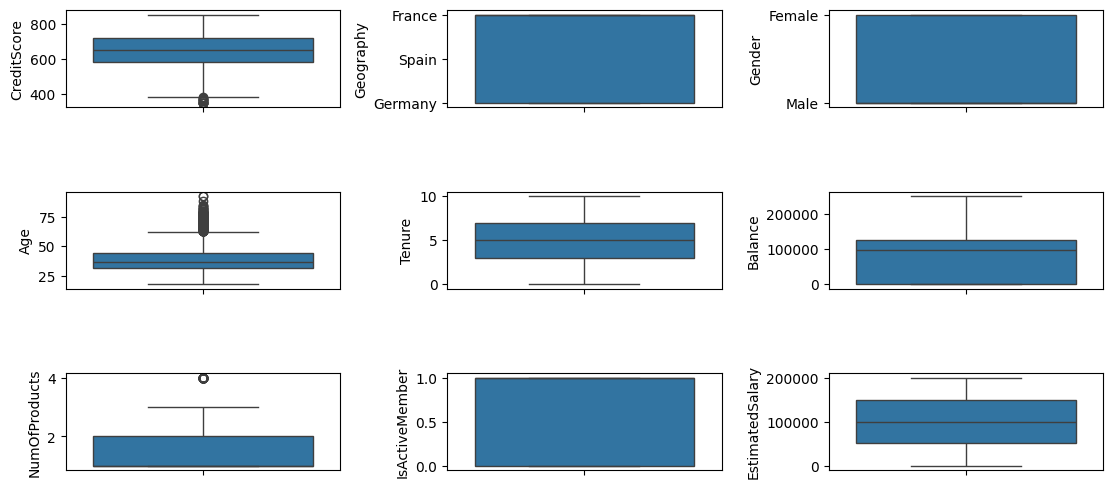

In [12]:
# Create the list column names
cols = list(df.iloc[ : , : -1])

# Create a matrix of subplots(3*3)
fig, axes = plt.subplots(3,3, figsize=(12, 6 ))

# Add padding around the subplots
fig.tight_layout(pad=4.0)

# Create a box plot based on the data
for i in range(len(cols)):
    sns.boxplot(ax=axes[i//3, i%3], y=df[cols[i]])

# Remove Outliers using IQR

In [13]:
df.shape

(10000, 10)

In [14]:
# specify the columns to remove outliers from dataframe
col_names = ["CreditScore", "NumOfProducts"]

# remove outliers for each selected columns using the IQR method
for col in col_names:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


In [15]:
df.shape

(9926, 10)

# Exploratory Data Analysis

In [16]:
df.groupby('Exited')['Exited'].count()

Exited
0    7963
1    1963
Name: Exited, dtype: int64

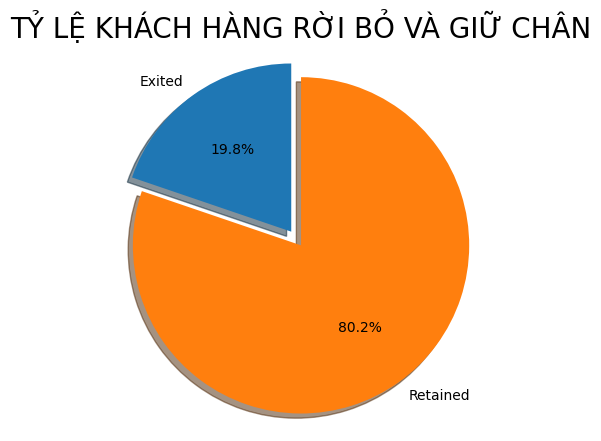

In [17]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(7, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("TỶ LỆ KHÁCH HÀNG RỜI BỎ VÀ GIỮ CHÂN", size = 20)
plt.show()

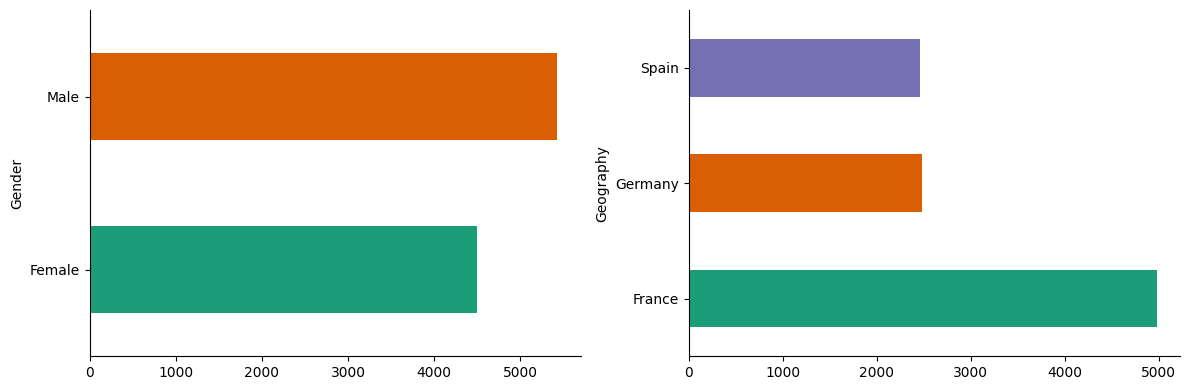

In [18]:
# List of categorical variables to plot
cat_vars = ['Gender', 'Geography']
def cat_plot(col):
  df.groupby(col).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
  plt.gca().spines[['top', 'right',]].set_visible(False)

# Create a chart grid for each categorical variable
plt.figure(figsize=(12, 4))
for i, var in enumerate(cat_vars, 1):
    plt.subplot(1, 2, i)
    cat_plot(var)

# adjust spacing between subplots
plt.tight_layout()

# show plot
plt.show()

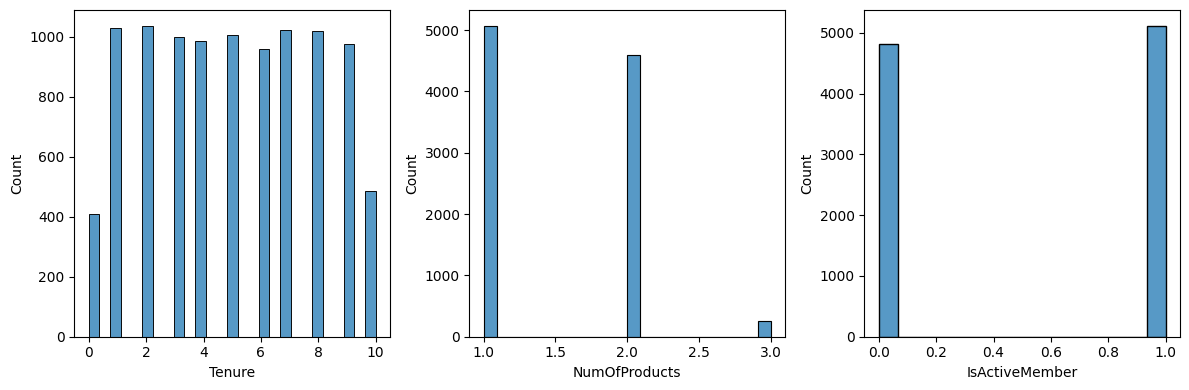

In [19]:
# List of numerical variables to plot
num_vars = ["Tenure", "NumOfProducts", "IsActiveMember"]

# Create a chart grid for each numerical variable
fig, axs = plt.subplots(1, 3, figsize = (12, 4))
axs = axs.ravel()

for i in range(len(num_vars)):
  sns.histplot(df[num_vars[i]], ax = axs[i])

fig.tight_layout()
plt.show()

<Axes: xlabel='Tenure', ylabel='Exited'>

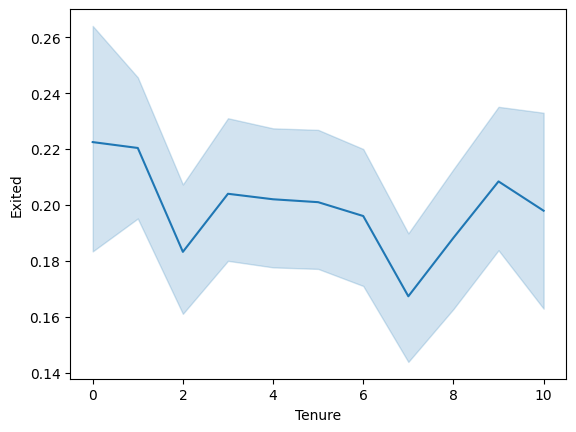

In [20]:
# Distribution of Tenure compare to Exited column
sns.lineplot(x = 'Tenure', y = 'Exited', data = df)

<Axes: xlabel='NumOfProducts', ylabel='Exited'>

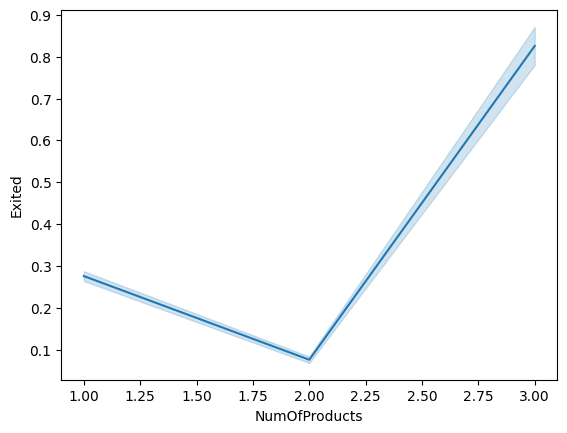

In [21]:
# Distribution of NumOfProducts compare to Exited column
sns.lineplot(x = 'NumOfProducts', y = 'Exited', data = df)

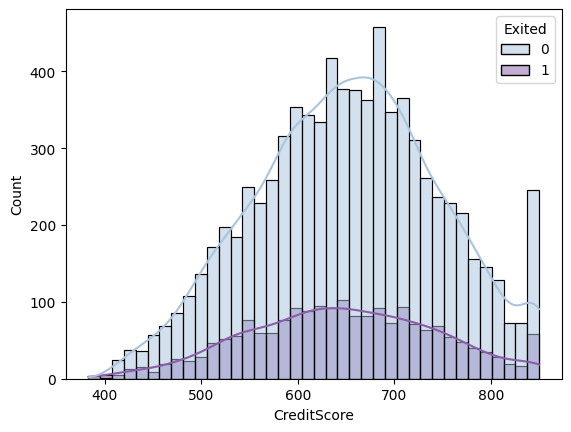

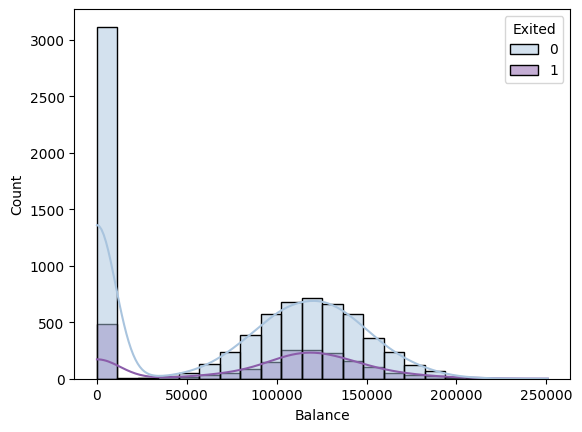

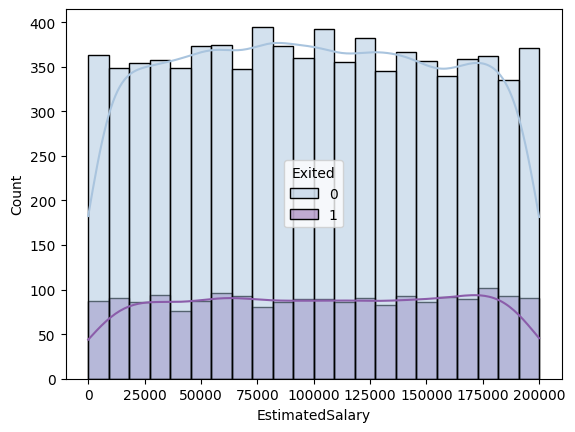

In [22]:
crecol= ['CreditScore', 'Balance', 'EstimatedSalary']
for i in crecol:
    sns.histplot (data = df, x= i, kde = True, hue = 'Exited', fill=True, palette='BuPu' )
    plt.show()

# Scatter plot

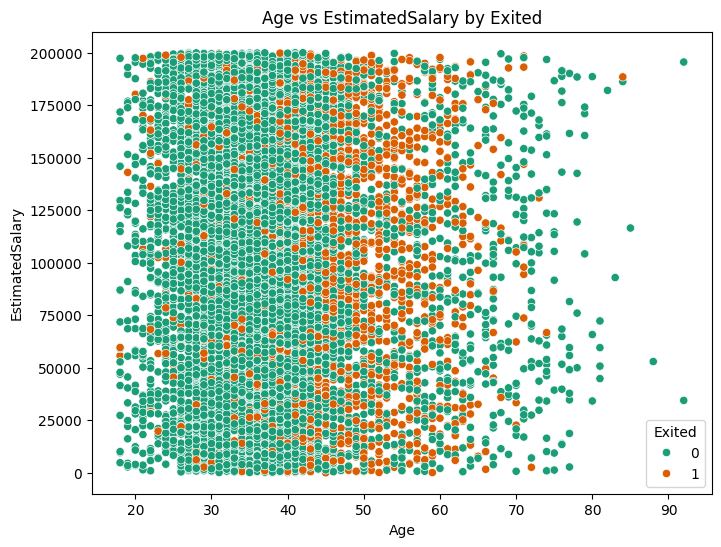

In [23]:
# Age vs EstimatedSalary by Exited
plt.figure(figsize = (8,6))
sns.scatterplot(data = df, x= 'Age', y = 'EstimatedSalary', hue = 'Exited', palette = 'Dark2')
plt.title('Age vs EstimatedSalary by Exited')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.show()

# Feature Engineering
## Công thức Balance / EstimatedSalary được sử dụng trong ngành tín dụng để đo lường mức độ nợ của một cá nhân so với thu nhập ước tính của họ. Công thức này được tính bằng cách chia số dư còn lại trên tài khoản hoặc tín dụng của khách hàng cho thu nhập ước tính của họ. Điều này giúp các tổ chức tín dụng đánh giá khả năng thanh toán của một khách hàng dựa trên mức độ nợ của họ so với thu nhập.
  ### Balance = Số dư còn lại trên tài khoản hoặc tín dụng của khách hàng
  ### EstimatedSalary = Thu nhập ước tính của họ

In [24]:
df["BalanceSalaryRatio"] = df["Balance"] / df["EstimatedSalary"]

# Data Preprocessing

In [25]:
scale_var = ['Tenure',  'Balance', 'EstimatedSalary', 'IsActiveMember', 'CreditScore']

scaler = MinMaxScaler()
df[scale_var] = scaler.fit_transform(df[scale_var])

In [26]:
# Encode labels where dtype is 'object'
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['Geography'] = LabelEncoder().fit_transform(df['Geography'])

In [27]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio
0,0.505353,0,0,42,0.2,0.000000,1,1.0,0.506735,1,0.000000
1,0.481799,2,0,41,0.1,0.334031,1,1.0,0.562709,0,0.744677
2,0.254818,0,0,42,0.8,0.636357,3,0.0,0.569654,1,1.401375
3,0.676660,0,0,39,0.1,0.000000,2,0.0,0.469120,0,0.000000
4,1.000000,2,0,43,0.2,0.500246,1,1.0,0.395400,0,1.587055


In [28]:
column_list = list(df.iloc[ : , : -1])
column_list.insert(-1, 'BalanceSalaryRatio')
df = df[column_list]
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,BalanceSalaryRatio,Exited
0,0.505353,0,0,42,0.2,0.000000,1,1.0,0.506735,0.000000,1
1,0.481799,2,0,41,0.1,0.334031,1,1.0,0.562709,0.744677,0
2,0.254818,0,0,42,0.8,0.636357,3,0.0,0.569654,1.401375,1
3,0.676660,0,0,39,0.1,0.000000,2,0.0,0.469120,0.000000,0
4,1.000000,2,0,43,0.2,0.500246,1,1.0,0.395400,1.587055,0


# Heatmap Correlation

<Axes: >

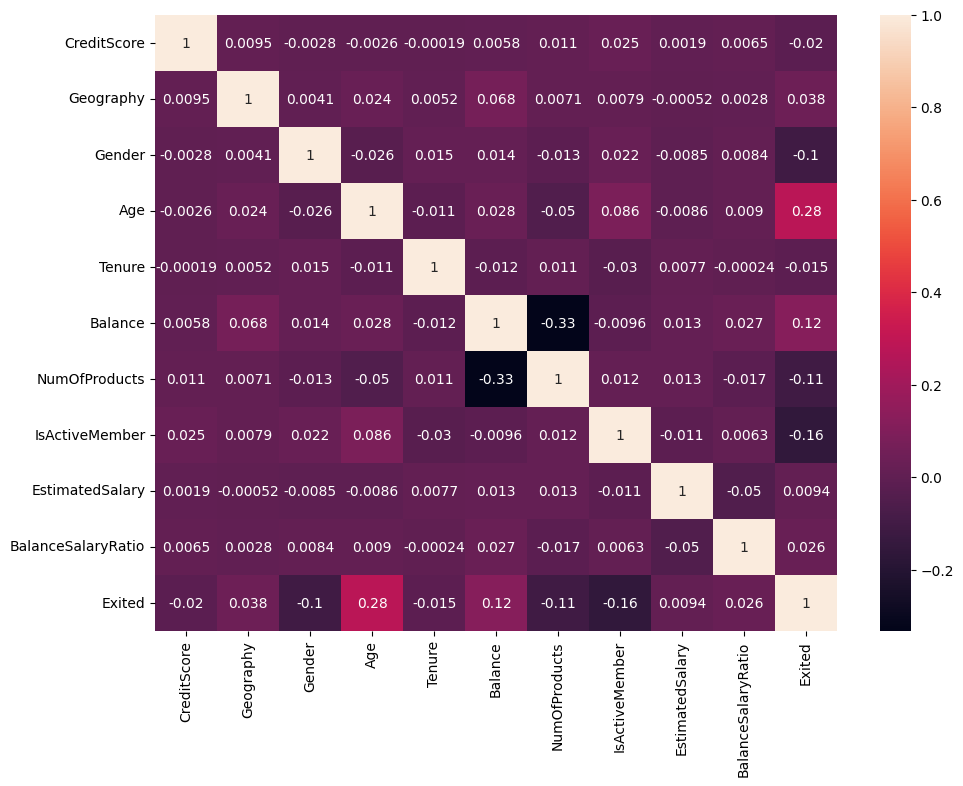

In [29]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize = (11, 8))
sns.heatmap(df.corr(), annot = True)

# Train Test Split

In [30]:
x = df.drop('Exited', axis = 1)
y = df['Exited']

In [31]:
# split data into train and test set (test size 30% and train size 70%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Decision Tree Regressor

In [32]:
from sklearn import tree
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

In [33]:
# Create a DecisionRegressor object
model = tree.DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [34]:
# Predict test dataset
y_pred = model.predict(X_test)


# Accuracy model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7938213566151779


In [35]:
# Tính toán precision và recall trên tập kiểm tra
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Tính toán AUC trên tập kiểm tra
auc = roc_auc_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)

Precision: 0.4559068219633943
Recall: 0.48841354723707664
AUC: 0.6765609316657042


<ipython-input-36-12c84be44e27>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Importance", y = "Feature", data = fi2, palette=palette)


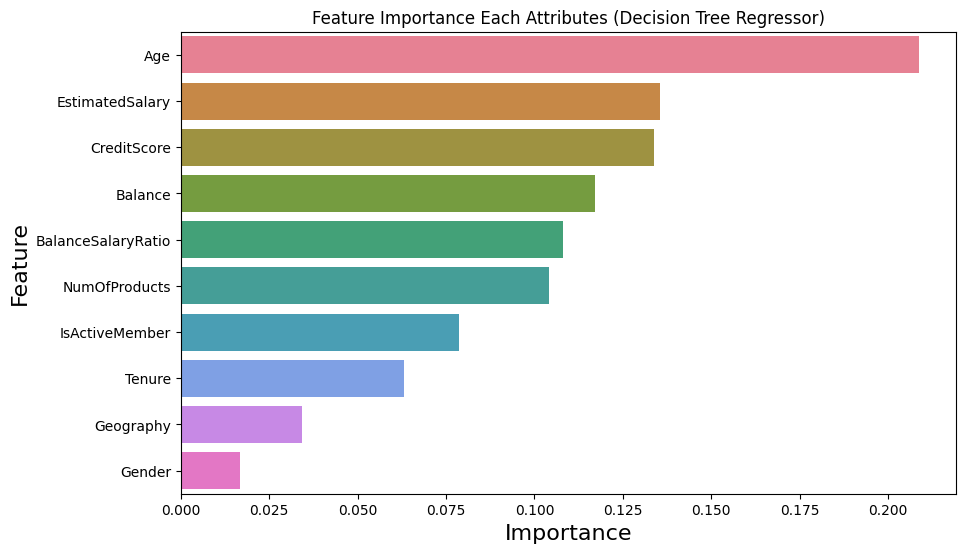

In [36]:
imp_df = pd.DataFrame(\
{
    "Feature": X_train.columns,\
    "Importance": model.feature_importances_
})
fi = imp_df.sort_values(by = "Importance", ascending = False)

fi2 = fi.head(10)
# Tạo danh sách màu sắc cho các thanh
palette = sns.color_palette("husl", len(fi2))


plt.figure(figsize = (10, 6))
sns.barplot(x = "Importance", y = "Feature", data = fi2, palette=palette)
plt.title("Feature Importance Each Attributes (Decision Tree Regressor)")
plt.xlabel("Importance", fontsize = 16)
plt.ylabel("Feature", fontsize = 16)
plt.show()

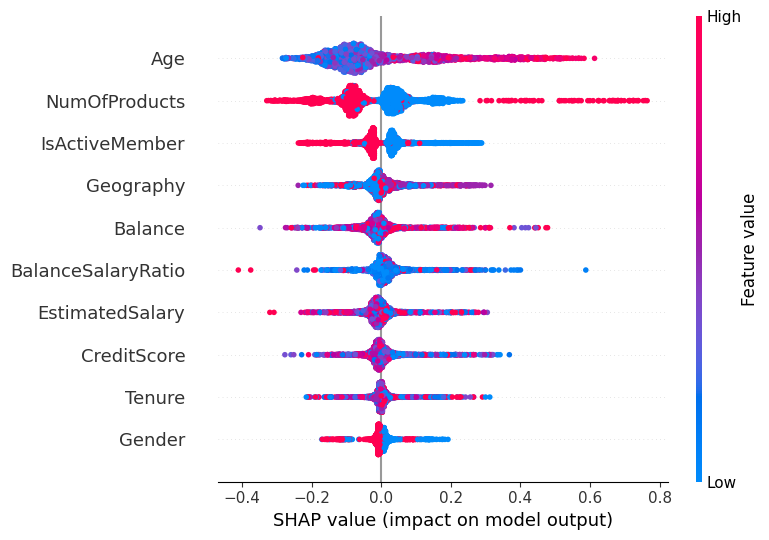

In [37]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

# Data Augmentation

In [38]:
exited = df[df['Exited'] == 1]
existing = df[df['Exited'] == 0]

num_exited = len(exited)
num_existing = len(existing)

# Nếu số lượng mẫu trong nhóm "Existing" lớn hơn 0, thực hiện oversampling
if num_existing > 0:
    # Oversampling nhóm Exited để có số lượng mẫu tương đương với nhóm Existing
    exited_oversampled = resample(exited, replace=True, n_samples=num_existing, random_state=42)

    # Kết hợp lại dữ liệu sau khi oversampling
    data_oversampled = pd.concat([exited_oversampled, existing])

else:
    print("Không thể thực hiện oversampling vì số lượng mẫu trong nhóm 'Existing' là 0.")

In [39]:
data_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15926 entries, 5606 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         15926 non-null  float64
 1   Geography           15926 non-null  int64  
 2   Gender              15926 non-null  int64  
 3   Age                 15926 non-null  int64  
 4   Tenure              15926 non-null  float64
 5   Balance             15926 non-null  float64
 6   NumOfProducts       15926 non-null  int64  
 7   IsActiveMember      15926 non-null  float64
 8   EstimatedSalary     15926 non-null  float64
 9   BalanceSalaryRatio  15926 non-null  float64
 10  Exited              15926 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 1.5 MB


In [40]:
# Tách dữ liệu thành features và target
X = data_oversampled.drop('Exited', axis=1)
y = data_oversampled['Exited']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (train 80%, test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,BalanceSalaryRatio
7045,1.000000,0,0,36,0.6,0.000000,2,1.0,0.951008,0.000000
9750,0.695931,0,0,51,0.8,0.282004,1,1.0,0.464587,0.761452
8719,0.659529,0,0,44,0.6,0.534345,2,1.0,0.987898,0.678567
8347,0.907923,2,0,28,0.7,0.661501,3,0.0,0.780627,1.063073
8231,0.865096,1,1,43,0.0,0.526977,1,0.0,0.104727,6.309581
...,...,...,...,...,...,...,...,...,...,...
6876,0.445396,0,0,42,1.0,0.000000,2,0.0,0.855520,0.000000
3681,0.627409,0,0,40,0.2,0.589098,1,0.0,0.475893,1.552867
5398,0.959315,1,1,44,0.3,0.442813,1,1.0,0.140676,3.947580
9842,0.546039,2,1,30,0.9,0.545275,2,1.0,0.533208,1.282865


# Random Forest Regressor

In [42]:
# Huấn luyện mô hình RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Đánh giá hiệu suất

In [43]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá hiệu suất mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9529190207156308


In [44]:
# Tính toán precision và recall trên tập kiểm tra
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Tính toán AUC trên tập kiểm tra
auc = roc_auc_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)

Precision: 0.9281930547380812
Recall: 0.9825545171339564
AUC: 0.9526940833614121


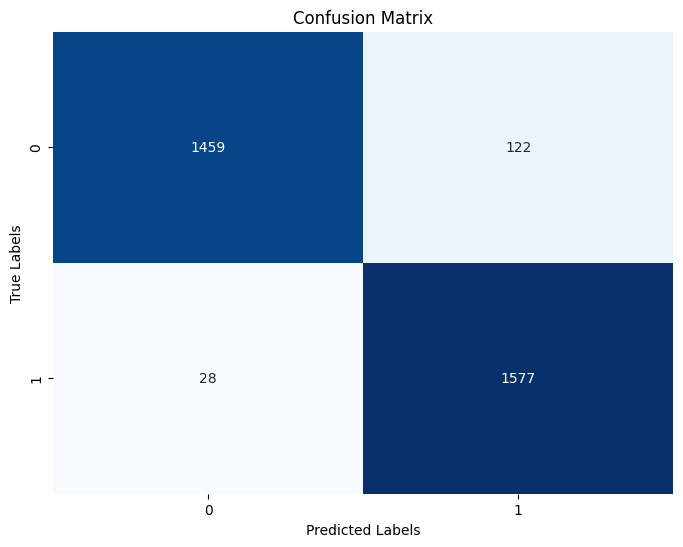

In [45]:
# Tính confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Vẽ confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

\

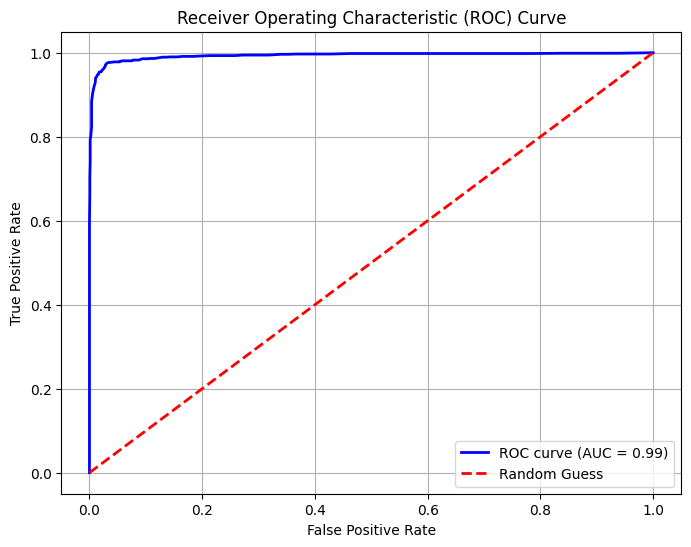

In [46]:
# Tính toán False Positive Rate (FPR) và True Positive Rate (TPR) cho mô hình Random Forest
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Tính toán diện tích dưới đường cong ROC (AUC)
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
# Vẽ ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [47]:
# Tính precision và recall cho cả hai lớp
precision_exited = precision_score(y_test, y_pred, pos_label=1)
recall_exited = recall_score(y_test, y_pred, pos_label=1)

precision_existing = precision_score(y_test, y_pred, pos_label=0)
recall_existing = recall_score(y_test, y_pred, pos_label=0)

print("Precision for exited class:", precision_exited)
print("Recall for exited class:", recall_exited)

print("Precision for existing class:", precision_existing)
print("Recall for existing class:", recall_existing)

Precision for exited class: 0.9281930547380812
Recall for exited class: 0.9825545171339564
Precision for existing class: 0.9811701412239409
Recall for existing class: 0.9228336495888678


In [48]:
f_score = (2* recall_exited* precision_exited)/(recall_exited+precision_exited)
f_score

0.9546004842615012

# Feature Importance

<ipython-input-49-fed746089c86>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Importance", y = "Feature", data = fi2, palette=palette)


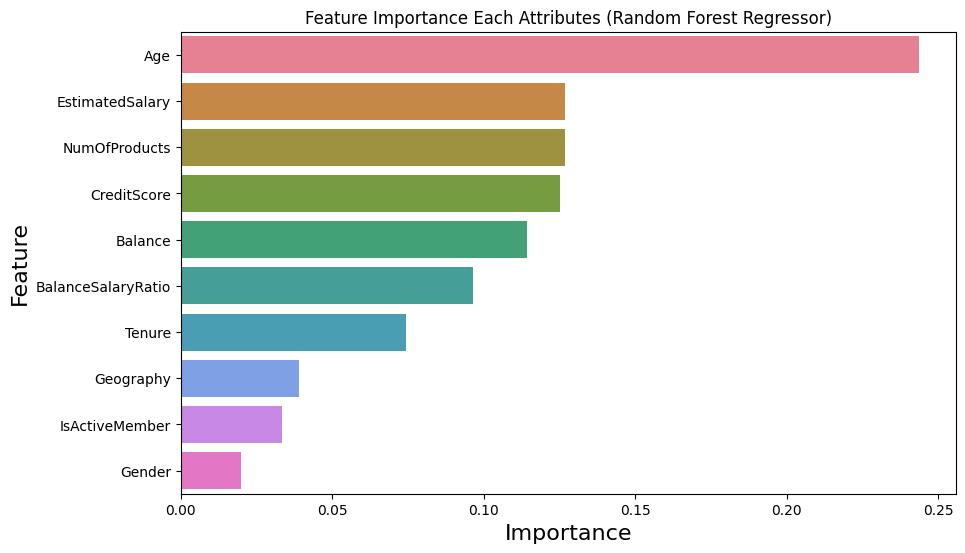

In [49]:
imp_df = pd.DataFrame(\
{
    "Feature": X_train.columns,\
    "Importance": model.feature_importances_
})
fi = imp_df.sort_values(by = "Importance", ascending = False)

fi2 = fi.head(10)
# Tạo danh sách màu sắc cho các thanh
palette = sns.color_palette("husl", len(fi2))


plt.figure(figsize = (10, 6))
sns.barplot(x = "Importance", y = "Feature", data = fi2, palette=palette)
plt.title("Feature Importance Each Attributes (Random Forest Regressor)")
plt.xlabel("Importance", fontsize = 16)
plt.ylabel("Feature", fontsize = 16)
plt.show()